In [41]:
import numpy as np
n=int(input("Enter the size of the square matrix (n): "))
print(f"Enter the {n}*{n} matrix row by row (Space Aeparated): ")
A=[]
for i in range(n):
    row=list(map(float, input(f"Row {i+1}: ").split()))
    A.append(row)
print(A)

Enter the size of the square matrix (n):  2 


Enter the 2*2 matrix row by row (Space Aeparated): 


Row 1:  2 1
Row 2:  1 2


[[2.0, 1.0], [1.0, 2.0]]


In [4]:
# split()
# Splits the input string into a list of substrings based on spaces.
# "1 2 3".split() → ["1", "2", "3"]
# map(float, ["1", "2", "3"])
# Applies the float() function to each element of the list.
# "1" → 1.0, "2" → 2.0, "3" → 3.0
# Now we get a map object containing [1.0, 2.0, 3.0].
# list(...)
# Converts the map object into a list.
# Final result: [1.0, 2.0, 3.0]

In [42]:
A=np.array(A)
print(A)

[[2. 1.]
 [1. 2.]]


In [43]:
eigenvalues, eignvectors=np.linalg.eig(A)
print(eigenvalues)

[3. 1.]


In [44]:
print(eignvectors)

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [45]:
Lambda=np.diag(eigenvalues)
print(Lambda)

[[3. 0.]
 [0. 1.]]


In [46]:
Q=eigenvectors
print(Q)

[[-0.76231552 -0.51853163]
 [ 0.64720557 -0.85505845]]


In [47]:
Q_Lambda=Q.T
print(Q_Lambda)

[[-0.76231552  0.64720557]
 [-0.51853163 -0.85505845]]


In [48]:
A_reconstructed=Q@Lambda@Q_Lambda

In [49]:
print(A_reconstructed)

[[ 2.0122499 -1.0367497]
 [-1.0367497  1.9877501]]


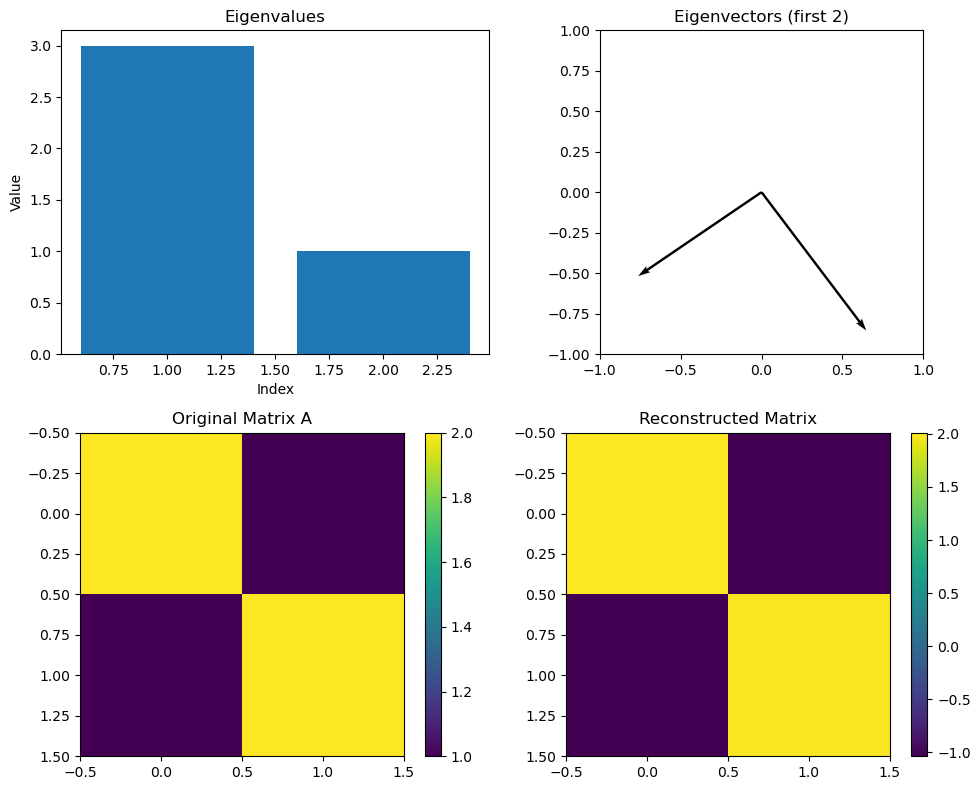

In [51]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Eigenvalues bar chart
axs[0, 0].bar(range(1, len(eigenvalues)+1), eigenvalues.real)
axs[0, 0].set_title("Eigenvalues")
axs[0, 0].set_xlabel("Index")
axs[0, 0].set_ylabel("Value")

# Eigenvectors quiver plot
origin = np.zeros((len(eigenvectors), 2))
axs[0, 1].quiver(*origin.T, eigenvectors[:,0].real, eigenvectors[:,1].real, angles='xy', scale=1, scale_units='xy')
axs[0, 1].set_xlim(-1, 1)
axs[0, 1].set_ylim(-1, 1)
axs[0, 1].set_aspect("equal")
axs[0, 1].set_title("Eigenvectors (first 2)")

#Heatmap of Original Matrix
im1 = axs[1, 0].imshow(A, cmap="viridis")
axs[1, 0].set_title("Original Matrix A")
plt.colorbar(im1, ax=axs[1, 0])

# Heatmap of Reconstructed Matrix
im2 = axs[1, 1].imshow(A_reconstructed.real, cmap="viridis")
axs[1, 1].set_title("Reconstructed Matrix")
plt.colorbar(im2, ax=axs[1, 1])

plt.tight_layout()
plt.show()